In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# function test
def diff(a, b, mode="absolute") -> float:
    """Calculate the absolute error or relative error

    input:
        `a`: float
        `b`: float
        `mode` can be "absolute" or "relative", default is "absolute"

    output:
        float
    """
    if mode == "absolute":
        return abs(a - b)
    elif mode == "relative":
        return abs((a - b) / b)
    else:
        print("Error: mode can only be 'absolute' or 'relative' !")
        exit(0)


def my_first_sin(x: float, n=100) -> float:
    """Take the first `n` terms of the Taylor series of `sin(x)`

    input:
        `x`: float
        `n`: int, default is 100

    output:
        float
    """
    res = 0
    item = x
    for i in range(n + 1):
        res += item
        item = item * (-1) * x * x / (2 * i + 2) / (2 * i + 3)
    return res


def my_second_sin(x: float) -> float:
    """Calculate Taylor series expansion of sin(x) until the absolute value of a certain item is less than the absolute value of the sum of the first n items 10^(-7)

    input:
        `x`: float

    output:
        float
    """
    res = 0
    n = 1
    item = x
    while abs(item) > 10 ** (-7) * abs(res):
        res += item
        n += 1
        item = item * (-1) * x * x / (2 * n - 1) / (2 * n - 2)
    return res


def my_third_sin(x: float):
    """Calculate Taylor series expansion of `sin(x)` two items at a time until the absolute value of a certain combination item is less than the absolute value of the sum of the first n items 10^(-7)

    input:
        `x`: float

    output:
        float
    """
    res = 0
    n = 2
    item_1 = x
    item_2 = (-1) * x * x * x / 2 / 3
    while True:
        combination_item = item_1 + item_2
        if abs(combination_item) < 10 ** (-7) * abs(res):
            break
        res += combination_item
        n += 1
        item_1 = item_2 * (-1) * x * x / (2 * n - 1) / (2 * n - 2)
        n += 1
        item_2 = item_1 * (-1) * x * x / (2 * n - 1) / (2 * n - 2)
    return res


def my_forth_sin(x: float, num=100):
    """Calculate Taylor series expansion of `sin(x)` two items at a time until the absolute value of a certain combination item is less than the absolute value of the sum of the first n items 10^(-7)

    input:
        `x`: float
        `num`: the number of terms in the series, default is 100

    output:
        float
    """
    x = x % (2 * np.pi)  # wrap x to [0, 2pi]

    res = 0
    n = 2
    item_1 = x
    item_2 = (-1) * x * x * x / 2 / 3
    while n < num:
        combination_item = item_1 + item_2
        res += combination_item
        n += 1
        item_1 = item_2 * (-1) * x * x / (2 * n - 1) / (2 * n - 2)
        n += 1
        item_2 = item_1 * (-1) * x * x / (2 * n - 1) / (2 * n - 2)
    return res


def plot(func_sin: callable) -> None:
    """Plot the the error between the result of the func_sin() and the result of the np.sin() function

    input:
        `func_sin`: function
    """
    fig = plt.figure()
    plt.title("Talor Expansion")
    plt.xlabel("Number of terms in series")
    plt.ylabel("Error")
    plt.yscale("log")

    num_of_terms = np.arange(1, 100)
    test_x = [0, 5, 10, 20, 30, 40]

    for x in test_x:
        error = [diff(func_sin(x, n), np.sin(x)) for n in num_of_terms]
        plt.plot(num_of_terms, error)

    plt.legend(labels=["0", "5", "10", "20", "30", "40"], loc="best")
    plt.tight_layout()
    plt.show()


               x = 31.41591653589793153856
     math.sin(x) = -0.00001000000000067940
 my_first_sin(x) =  0.00026469823623408579, error =  0.00027469823623476518
my_second_sin(x) =  0.00002731828858631688, error =  0.00003731828858699628
 my_third_sin(x) =  0.00002704832029100275, error =  0.00003704832029168216
 my_forth_sin(x) = -0.00001000000001091478, error =  0.00000000000001023538


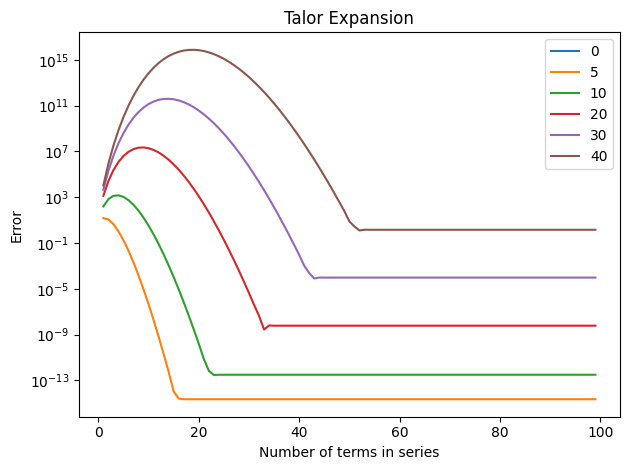

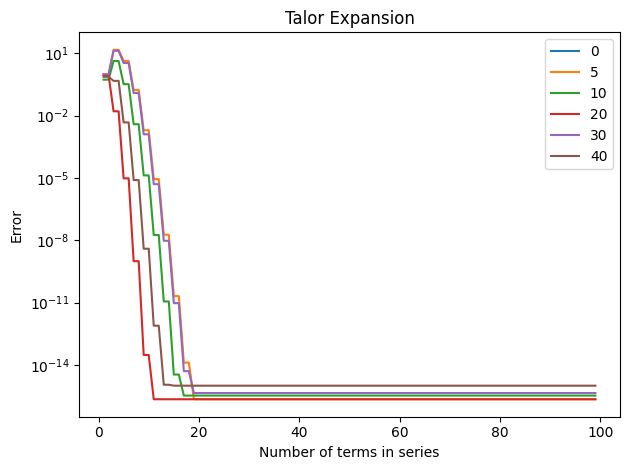

In [ ]:
# calculate the absolute error and relative error with np.sin(x)
x = np.pi * 10 - 0.00001
n = 100

print("               x = %23.20f" % x)
print("     math.sin(x) = %23.20f" % np.sin(x))
print(" my_first_sin(x) = %23.20f, error = %23.20f" % (my_first_sin(x, n), diff(my_first_sin(x), np.sin(x))))
print("my_second_sin(x) = %23.20f, error = %23.20f" % (my_second_sin(x), diff(my_second_sin(x), np.sin(x))))
print(" my_third_sin(x) = %23.20f, error = %23.20f" % (my_third_sin(x), diff(my_third_sin(x), np.sin(x))))
print(" my_forth_sin(x) = %23.20f, error = %23.20f" % (my_forth_sin(x), diff(my_forth_sin(x), np.sin(x))))


plot(my_first_sin)  # plot the error of my_first_sin(x) with different n

plot(my_forth_sin)  # plot the error of my_forth_sin(x) with different x